In [390]:
####IMPORTS
from cmath import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pyparsing import nums
plt.style.use('ggplot')

In [391]:
#organise TLM data
fileName = "Results/CasTemp4Trial_10-39.csv"
layout = ['DateTime', 'RawMFCData', 'MFCData','RawPressureData', 'PressureData', 'MAPressureData', 'InputMFCValue', 'Height', 'Weight']
df = pd.read_csv(fileName, sep = ',', names=layout)
df = df[1:]
InitialPressuredf = df      ##To do the 0 analysis of pressure

for col in range(1, 9):
    df[df.columns[col]] = pd.to_numeric(df[df.columns[col]])


##Filter out times outside of the dip
Date_Time = df["DateTime"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f") for x in df['DateTime']]
DipFilter = 60*30
DipStart = Date_Time[DipFilter]         ##Convert to a time input
DipEnd = Date_Time[-DipFilter]          ##Convert to a time input


df = df[(df["DateTime"] >= DipStart) & (df["DateTime"] <= DipEnd)]
Date_Time = df["DateTime"]
CycleTime = (DipEnd - DipStart).total_seconds()
TimeDiff = [(x - DipStart).total_seconds() for x in df["DateTime"]]


df


,DateTime,RawMFCData,MFCData,RawPressureData,PressureData,MAPressureData,InputMFCValue,Height,Weight
1801,2022-12-06 11:02:18.070363,0.210661,0.631982,2.610753,0.234301,0.236460,0.166667,0.344342,13.910509
1802,2022-12-06 11:02:18.793834,0.226759,0.680278,2.609465,0.233786,0.236287,0.166667,0.344091,13.899164
1803,2022-12-06 11:02:19.503781,0.184903,0.554709,2.589503,0.225801,0.235611,0.166667,0.343106,13.854685
1804,2022-12-06 11:02:20.224594,0.192308,0.576925,2.594332,0.227733,0.235102,0.166667,0.342365,13.821287
1805,2022-12-06 11:02:20.943566,0.185869,0.557607,2.602704,0.231081,0.234843,0.166667,0.341988,13.804246
...,...,...,...,...,...,...,...,...,...
7729,2022-12-06 12:14:48.295729,0.174600,0.523800,2.363156,0.135263,0.140455,0.166667,0.204536,7.866428
7730,2022-12-06 12:14:49.040679,0.159467,0.478402,2.346414,0.128566,0.139688,0.166667,0.203419,7.820320
7731,2022-12-06 12:14:49.762181,0.163653,0.490958,2.352209,0.130884,0.139120,0.166667,0.202592,7.786199
7732,2022-12-06 12:14:50.526832,0.162043,0.486129,2.333213,0.123285,0.138098,0.166667,0.201104,7.724878


In [392]:
fileNameBS = "Results/British Steel/grafana_data_export (27).csv"
layoutBS = ['Time', 'GrossWeight', 'NetWeight', 'TareWeight', 'CastingRate', 'Position']
 
dg = pd.read_csv(fileNameBS, sep = ';', names=layoutBS)
dg = dg[2:]
dg[dg.columns[1:]] = dg[dg.columns[1:]].apply(lambda x: x.astype(float))
dg["Time"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in dg['Time']]
dg = dg[(dg["Time"] >= DipStart) & (dg["Time"] <= DipEnd)]
Date_TimeBS = dg["Time"]
TimeDiffBS = [(x - DipStart).total_seconds() for x in Date_TimeBS]
dg

,Time,GrossWeight,NetWeight,TareWeight,CastingRate,Position
117,2022-12-06 11:03:20,78.286,30.236,48.05,4.085,1.0
118,2022-12-06 11:04:30,79.761,31.711,48.05,4.085,1.0
119,2022-12-06 11:05:40,79.729,31.679,48.05,4.085,1.0
120,2022-12-06 11:06:50,78.404,30.354,48.05,4.085,1.0
121,2022-12-06 11:08:00,78.711,30.661,48.05,4.085,1.0
...,...,...,...,...,...,...
174,2022-12-06 12:09:50,79.832,31.782,48.05,4.085,1.0
175,2022-12-06 12:11:00,78.400,30.350,48.05,4.085,1.0
176,2022-12-06 12:12:10,78.561,30.511,48.05,4.085,1.0
177,2022-12-06 12:13:20,79.821,31.771,48.05,4.085,1.0


In [393]:
##Mass Flow Analysis
MFCData = [float(x) for x in df["MFCData"]]
MFCData1 = MFCData[DipFilter:-DipFilter]
print("Mean: ", "{:.3f}".format(np.mean(MFCData1)))
print("Variance: ", "{:.3f}".format(np.var(MFCData1)))
print("Standard Deviation: ", "{:.3f}".format(np.std(MFCData1)))
print("Minimum: ", "{:.3f}".format(np.min(MFCData1)))
print("Maximum: ", "{:.3f}".format(np.max(MFCData1)))

Mean:  0.557
Variance:  0.003
Standard Deviation:  0.055
Minimum:  0.436
Maximum:  0.673


In [394]:
##Pressure Analysis
MAPressureData = [float(x) for x in df["MAPressureData"]]
MAPressureData1 = MAPressureData[DipFilter:-DipFilter]
PressureData = [float(x) for x in df["PressureData"]]
PressureData1 = PressureData[DipFilter:-DipFilter]
InitialData = [float(x) for x in InitialPressuredf["MAPressureData"]]
InitialData1 = InitialData[200:400]
print("Initial Pressure, MA Pressure, Pressure")
print("Mean: ", "{:.3f}".format(np.mean(InitialData1)), ",", "{:.3f}".format(np.mean(MAPressureData1)), ",", "{:.3f}".format(np.mean(PressureData1)))
print("Variance: ", "{:.3f}".format(np.var(InitialData1)), ",", "{:.3f}".format(np.var(MAPressureData1)), ",", "{:.3f}".format(np.var(PressureData1)))
print("Standard Deviation: ", "{:.3f}".format(np.std(InitialData1)), ",", "{:.3f}".format(np.std(MAPressureData1)), ",", "{:.3f}".format(np.std(PressureData1)))
print("Minimum: ", "{:.3f}".format(np.min(InitialData1)), ",", "{:.3f}".format(np.min(MAPressureData1)), ",", "{:.3f}".format(np.min(PressureData1)))
print("Maximum: ", "{:.3f}".format(np.max(InitialData1)), ",", "{:.3f}".format(np.max(MAPressureData1)), ",", "{:.3f}".format(np.max(PressureData1)))

Initial Pressure, MA Pressure, Pressure
Mean:  0.042 , 0.136 , 0.136
Variance:  0.000 , 0.000 , 0.000
Standard Deviation:  0.002 , 0.008 , 0.011
Minimum:  0.039 , 0.119 , 0.108
Maximum:  0.047 , 0.151 , 0.164


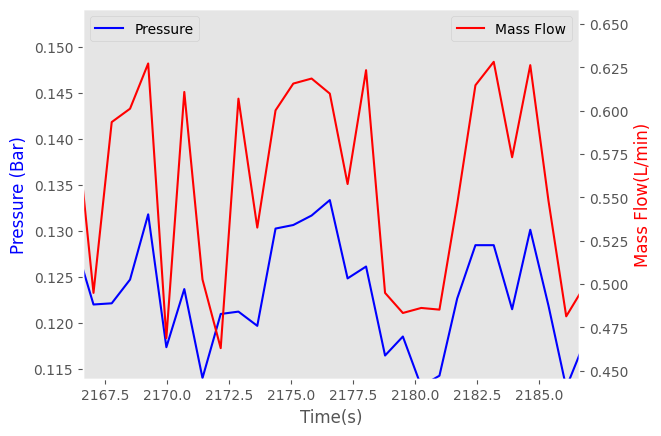

In [395]:
##Pressure Against Mass Flow Plotting
fig, ax1 = plt.subplots()

##Pressure Formatting
ax1.plot(TimeDiff, PressureData, 'b', label = 'Pressure')
ax1.set_ylabel('Pressure (Bar)', color='b')

##Mass Flow Formatting
ax2 = ax1.twinx()
ax2.plot(TimeDiff, MFCData, 'r-', label = 'Mass Flow')
ax2.set_ylabel('Mass Flow(L/min)', color='r')

##Graph Formatting
ax1.set_xlim([(CycleTime/2)-10, (CycleTime/2)+10])
ax1.set_ylim([np.min(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*0.95, np.max(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*1.05])
ax2.set_ylim([np.min(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*0.95, np.max(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*1.05])
ax1.grid(which='both', visible=False)
ax2.grid(which='both', visible=False)
ax1.set_xlabel('Time(s)')
ax1.legend(loc='upper left')
ax2.legend()



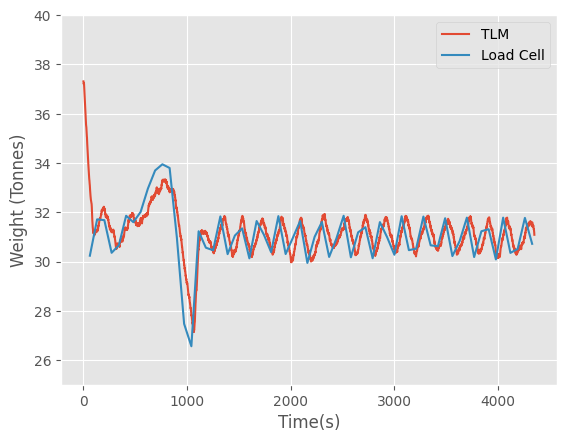

In [396]:
##Weight Plotting
WeightData = [float(x) + 23.4 for x in df["Weight"]]            ##Remove Offset
WeightDataBS = [float(x) for x in dg["NetWeight"]]

##Formatting
plt.ylim([25, 40])
plt.xlabel('Time(s)')
plt.ylabel('Weight (Tonnes)')

##Plot
plt.plot(TimeDiff, WeightData, label = 'TLM')
plt.plot(TimeDiffBS, WeightDataBS, label = 'Load Cell')
plt.legend()

C:\Users\f87580\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


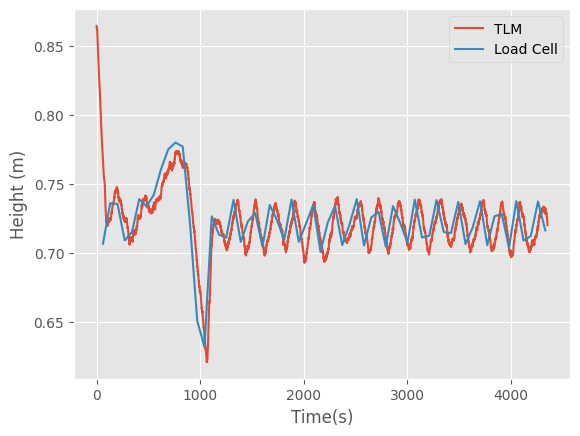

In [397]:
##Height Plotting
HeightData = [float(x) + 0.52 for x in df["Height"]]      ##Height Offset
a = 0.20675966114731492
b = 5.089351257804871
HeightDataBS = [(-b+sqrt((b*b)+(4*a*x)))/(2*7*a) for x in WeightDataBS]


##Formatting
plt.xlabel('Time(s)')
plt.ylabel('Height (m)')
plt.plot(TimeDiff, HeightData, label = 'TLM')
plt.plot(TimeDiffBS, HeightDataBS, label = 'Load Cell')
plt.legend()

In [398]:
##Height & Weight Extremity Analysis

In [399]:
##Pressure Correction Work
df[df.columns[1:]] = df[df.columns[1:]].applymap(lambda x: round(x, 2))
df

C:\Users\f87580\AppData\Local\Temp\ipykernel_14620\3277381207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[1:]] = df[df.columns[1:]].applymap(lambda x: round(x, 2))


,DateTime,RawMFCData,MFCData,RawPressureData,PressureData,MAPressureData,InputMFCValue,Height,Weight
1801,2022-12-06 11:02:18.070363,0.21,0.63,2.61,0.23,0.24,0.17,0.34,13.91
1802,2022-12-06 11:02:18.793834,0.23,0.68,2.61,0.23,0.24,0.17,0.34,13.90
1803,2022-12-06 11:02:19.503781,0.18,0.55,2.59,0.23,0.24,0.17,0.34,13.85
1804,2022-12-06 11:02:20.224594,0.19,0.58,2.59,0.23,0.24,0.17,0.34,13.82
1805,2022-12-06 11:02:20.943566,0.19,0.56,2.60,0.23,0.23,0.17,0.34,13.80
...,...,...,...,...,...,...,...,...,...
7729,2022-12-06 12:14:48.295729,0.17,0.52,2.36,0.14,0.14,0.17,0.20,7.87
7730,2022-12-06 12:14:49.040679,0.16,0.48,2.35,0.13,0.14,0.17,0.20,7.82
7731,2022-12-06 12:14:49.762181,0.16,0.49,2.35,0.13,0.14,0.17,0.20,7.79
7732,2022-12-06 12:14:50.526832,0.16,0.49,2.33,0.12,0.14,0.17,0.20,7.72


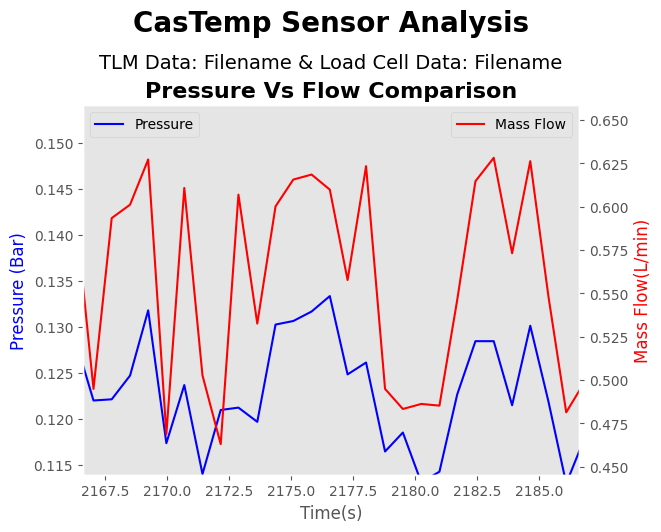

In [420]:
# First figure: Pressure against Mass Flow
fig1, ax1 = plt.subplots()
ax1.text(0.5, 1.2, "CasTemp Sensor Analysis", transform=ax1.transAxes, fontsize=20, fontweight='bold', ha = 'center')
ax1.text(0.5, 1.1, "TLM Data: " + 'Filename' + ' & ' + "Load Cell Data: " + 'Filename', transform=ax1.transAxes, fontsize=14, ha = 'center')
ax1.set_title("\nPressure Vs Flow Comparison", fontsize=16, fontweight='bold', ha = 'center')
# Pressure formatting
ax1.plot(TimeDiff, PressureData, 'b', label = 'Pressure')
ax1.set_ylabel('Pressure (Bar)', color='b')
# Mass Flow formatting
ax2 = ax1.twinx()
ax2.plot(TimeDiff, MFCData, 'r-', label = 'Mass Flow')
ax2.set_ylabel('Mass Flow(L/min)', color='r')
# Graph formatting
ax1.set_xlim([(CycleTime/2)-10, (CycleTime/2)+10])
ax1.set_ylim([np.min(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*0.95, np.max(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*1.05])
ax2.set_ylim([np.min(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*0.95, np.max(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)])*1.05])
ax1.grid(which='both', visible=False)
ax2.grid(which='both', visible=False)
ax1.set_xlabel('Time(s)')
ax1.legend(loc='upper left')
ax2.legend()

